# Load libraries

In [6]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

import os
import glob

# Load and Combine Datasets

In [7]:
# Make a list of all the decade dataset file names.
all_file_names = [i for i in glob.glob('./Spotify/*.csv')]

# Sort the list so decades appear in chronological order.
all_file_names = sorted(all_file_names, key=lambda decade: int(decade[-9:-5]))

all_decades = []
for file_name in all_file_names:
    # Create the dataframe.
    decade = pd.DataFrame(pd.read_csv(file_name))
    # Name the dataframe by the decade.
    decade.name = file_name[-9:-5]
    all_decades.append(decade)

# Add a decade column to each decade dataframe.
for decade in all_decades:
    decade['decade'] = int(decade.name)

# Combine all decades into one dataframe.
df = pd.concat([f for f in all_decades ], ignore_index = True)

# Dataset Information

In [8]:
# Total number of tracks.
print(str(len(df.index)-1) + ' tracks')

# Head of dataset.
print(df.head())

41105 tracks
                   track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2   

# Data Cleaning

In [9]:
# Check for null values in the dataframe.
print('Dataset contains null values' if df.isnull().values.any() else 'No null values')
print(df.isnull().sum())

No null values
track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64


# Data Analysis

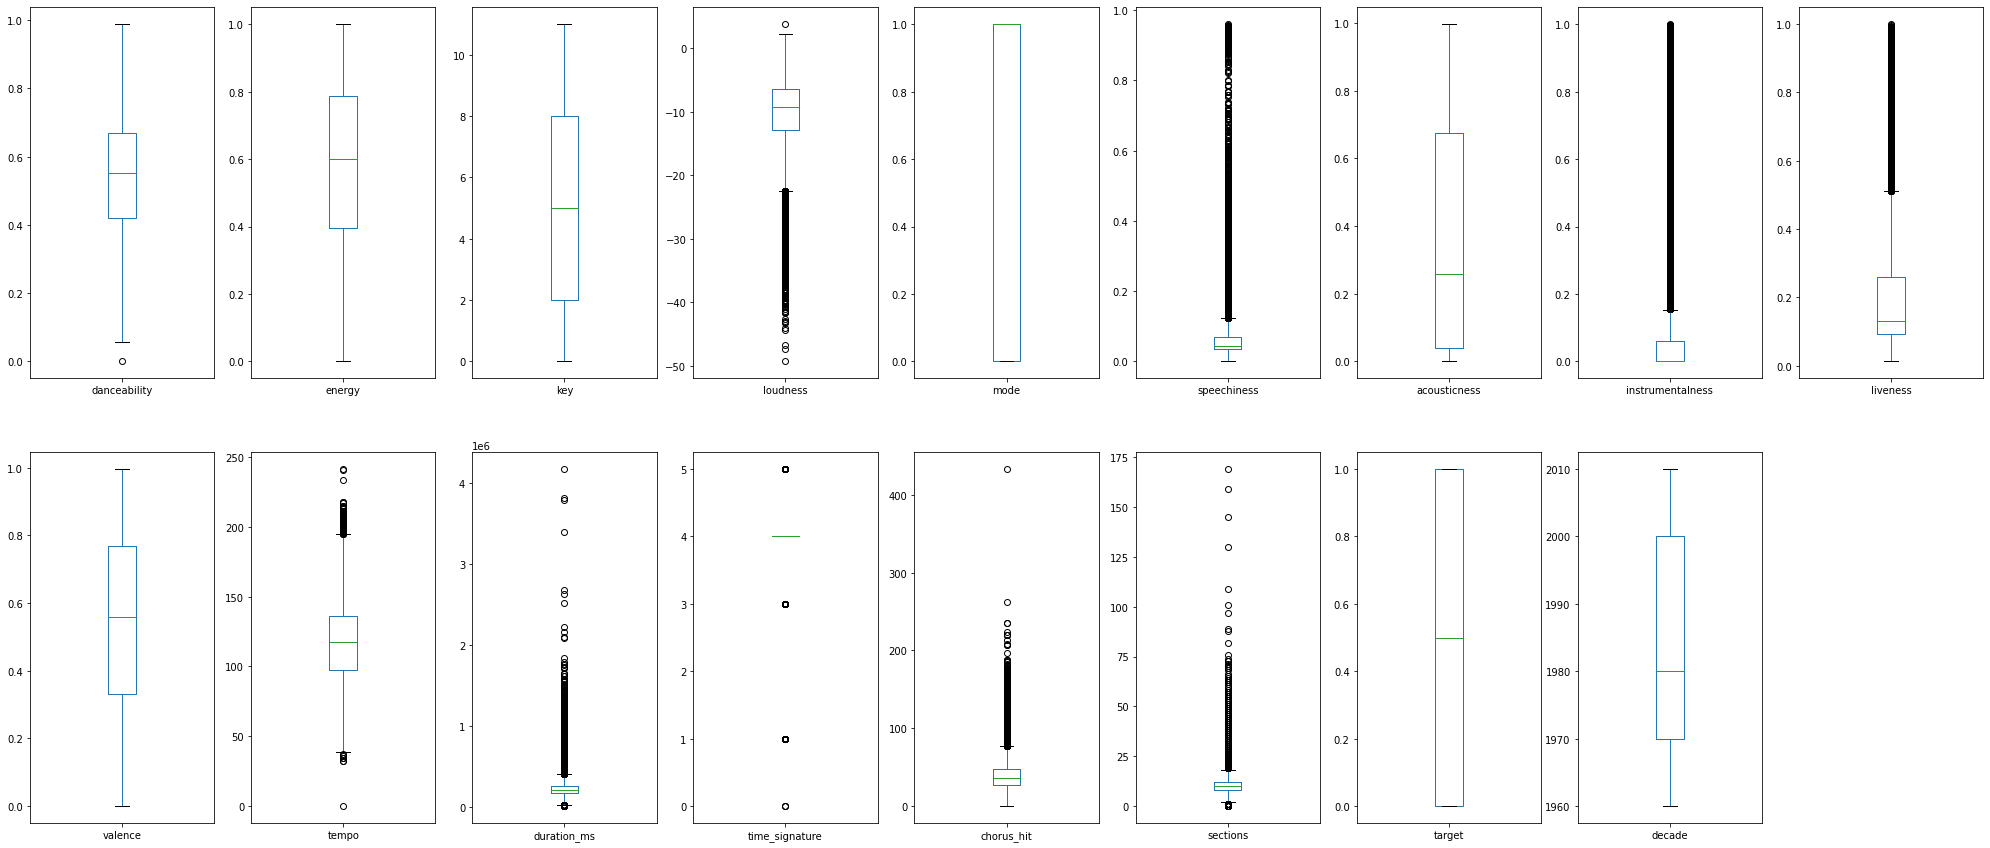

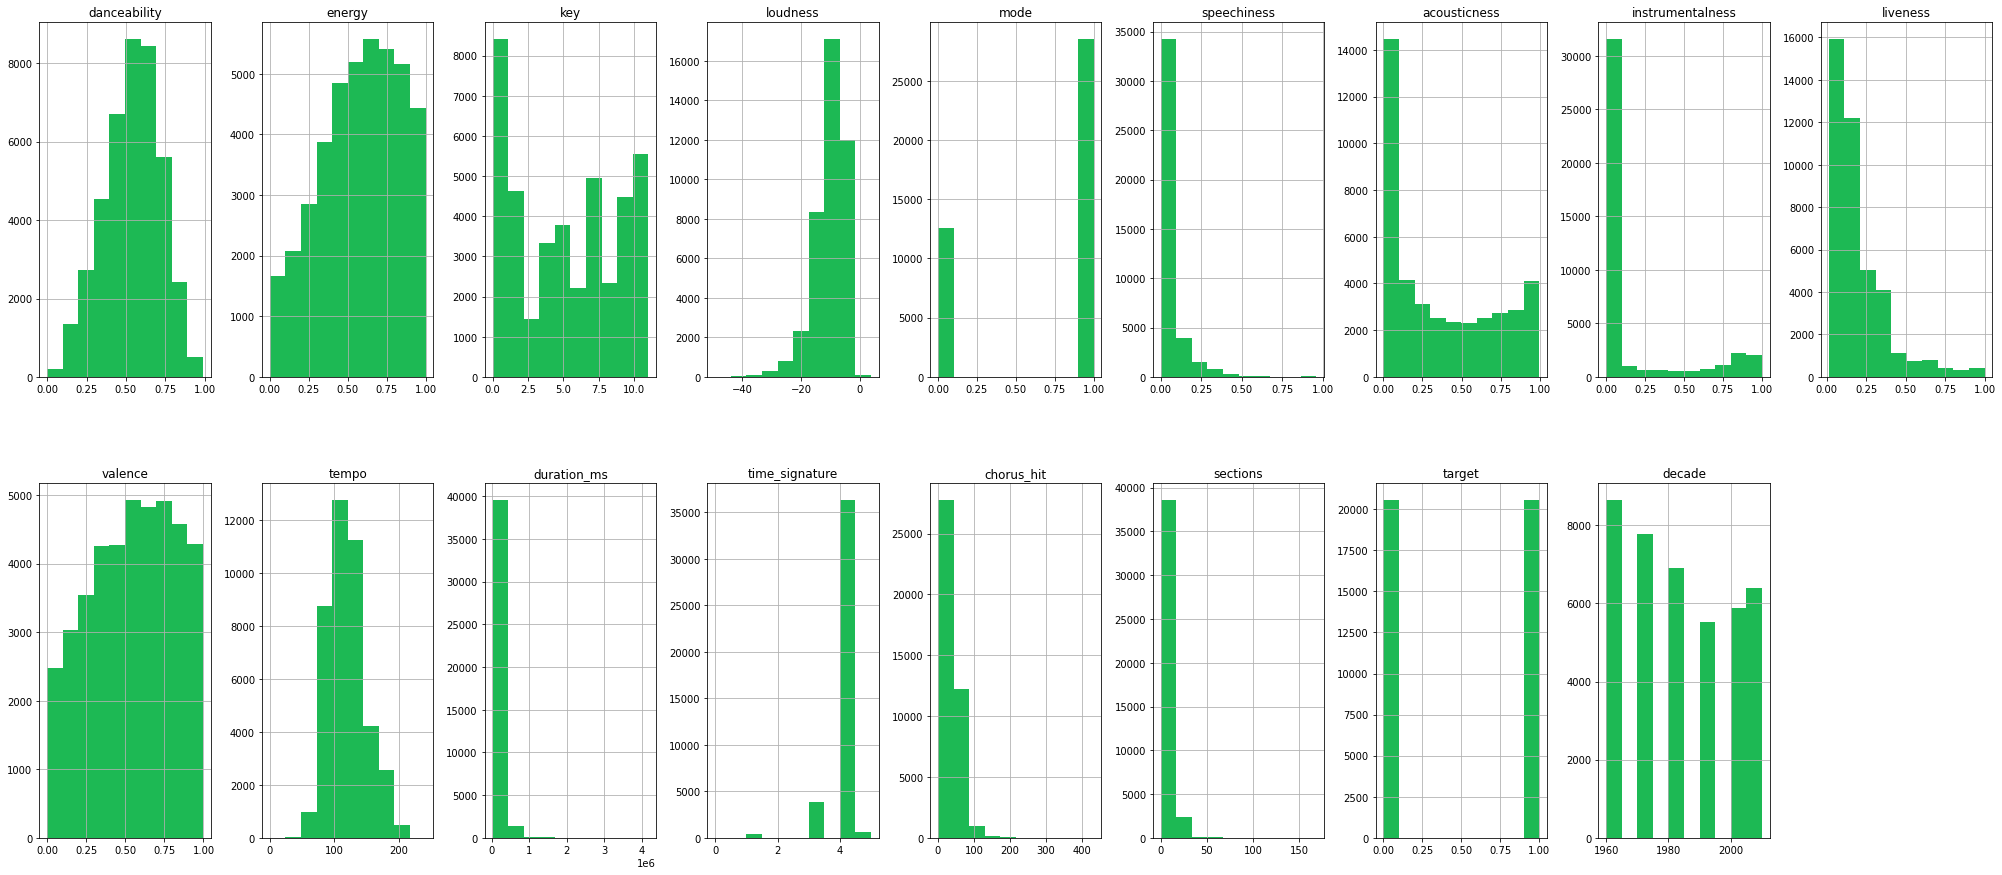

In [10]:
# Box and whisker plots for each feature.
df.plot(kind='box', subplots=True, layout=(2,9), figsize=(35,15))

# Histograms for each feature.
df.hist(layout=(2,9), color = '#1DB954', figsize=(35,15))
pyplot.show()

# Data Splitting

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data = {}

# Iterate through each decade.
for decade, tracks in df.groupby('decade'):
    tracks_array = tracks.values

    # Features to be used for prediction.
    #x[3:] for x in data[1990]['X_train']
    X = sc.fit_transform(tracks_array[:,3:18])

    # 'hit' (1) or 'flop' (0) column to predict.
    Y = tracks_array[:,18]

    # Split data between training and testing in a 4:1 ratio respectively.
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

    # Collect the split data into a dictionary.
    decade_data = {
        'X_train': X_train.tolist(),
        'X_test': X_test.tolist(),
        'Y_train': Y_train.tolist(),
        'Y_test': Y_test.tolist()
    }

    data[decade] = decade_data


# Random Forest Classifer

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      5196
           1       0.75      0.84      0.79      5081

    accuracy                           0.78     10277
   macro avg       0.78      0.78      0.78     10277
weighted avg       0.79      0.78      0.78     10277



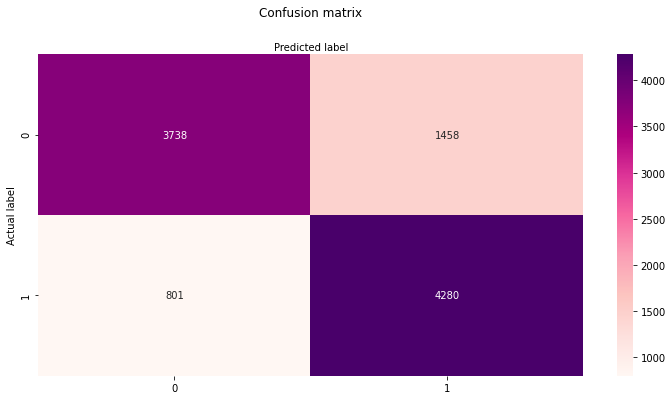

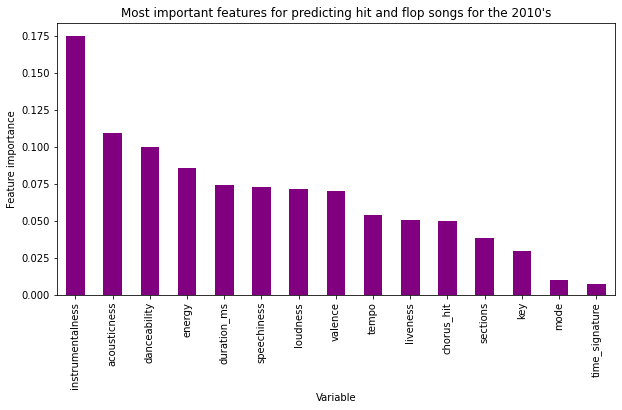

In [17]:
from sklearn import metrics

indep_columns = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']

X = df[indep_columns]
y = df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) #use 75% of the data for training the model and 25% of the model for testing
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

#create a figure/heatmap of the confusion matrix for a better visual
pyplot.rcParams['figure.figsize']=(10,5)
class_names=[0,1] # name  of classes
fig, ax = pyplot.subplots()
tick_marks = np.arange(len(class_names))
pyplot.xticks(tick_marks, class_names)
pyplot.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
pyplot.tight_layout()
pyplot.title('Confusion matrix', y=1.1)
pyplot.ylabel('Actual label')
pyplot.xlabel('Predicted label')

tens_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_columns)
df_tens_feat = pd.DataFrame(tens_feat)
tens_feat_vars = pd.concat([df_indep_columns, df_tens_feat], axis = 1)
tens_feat_vars.columns = ['Variable', 'Feature importance 2010s']
tens_feat_vars = tens_feat_vars.set_index('Variable')
tens_feat_vars = tens_feat_vars.sort_values(by=['Feature importance 2010s'], ascending = False)

tens_feat_vars.plot(kind='bar', color = "purple", title = "Most important features for predicting hit and flop songs for the 2010's", legend = None)
pyplot.ylabel('Feature importance')

pyplot.show()

# Multilayer Perceptron Classification

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
"""
parameter_space = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'max_iter': [200, 300, 500, 1000],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(data[1980]['X_train'], data[1980]['Y_train'])
print('Best parameters found:\n', clf.best_params_)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(data[1980]['Y_test'], clf.predict(data[1980]['X_test'])))
"""

for decade in range(1960, 2020, 10):
    clf = MLPClassifier(random_state=1)
    clf.fit(data[decade]['X_train'], data[decade]['Y_train'])

    predictions = clf.predict(data[decade]['X_test'])

    print(str(decade))
    print(classification_report(data[decade]['Y_test'], clf.predict(data[decade]['X_test'])))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1960
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       880
           1       0.73      0.84      0.78       849

    accuracy                           0.77      1729
   macro avg       0.78      0.77      0.77      1729
weighted avg       0.78      0.77      0.77      1729



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1970
              precision    recall  f1-score   support

           0       0.78      0.70      0.73       771
           1       0.73      0.80      0.76       783

    accuracy                           0.75      1554
   macro avg       0.75      0.75      0.75      1554
weighted avg       0.75      0.75      0.75      1554



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1980
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       670
           1       0.77      0.84      0.81       712

    accuracy                           0.79      1382
   macro avg       0.79      0.79      0.79      1382
weighted avg       0.79      0.79      0.79      1382



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1990
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       571
           1       0.81      0.90      0.85       533

    accuracy                           0.85      1104
   macro avg       0.85      0.85      0.85      1104
weighted avg       0.85      0.85      0.85      1104



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2000
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       590
           1       0.82      0.89      0.85       585

    accuracy                           0.85      1175
   macro avg       0.85      0.85      0.84      1175
weighted avg       0.85      0.85      0.84      1175

2010
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       633
           1       0.79      0.85      0.82       647

    accuracy                           0.81      1280
   macro avg       0.81      0.81      0.81      1280
weighted avg       0.81      0.81      0.81      1280



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


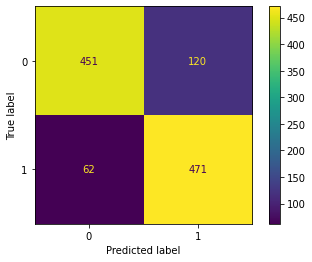

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(data[1990]['Y_test'], predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()